## Dashboards

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("SalesForCourse_quizz_table.csv", parse_dates=["Date"])

In [3]:
df

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.00,February,29.00,F,United States,Washington,Accessories,Tires and Tubes,1.00,80.00,109.00,80.00,109.00
1,2016-02-20,2016.00,February,29.00,F,United States,Washington,Clothing,Gloves,2.00,24.50,28.50,49.00,57.00
2,2016-02-27,2016.00,February,29.00,F,United States,Washington,Accessories,Tires and Tubes,3.00,3.67,5.00,11.00,15.00
3,2016-03-12,2016.00,March,29.00,F,United States,Washington,Accessories,Tires and Tubes,2.00,87.50,116.50,175.00,233.00
4,2016-03-12,2016.00,March,29.00,F,United States,Washington,Accessories,Tires and Tubes,3.00,35.00,41.67,105.00,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,2016-02-07,2016.00,February,38.00,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.00,1160.00,985.50,2320.00,1971.00
34863,2015-03-13,2015.00,March,38.00,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.00,2049.00,1583.00,2049.00,1583.00
34864,2015-04-05,2015.00,April,38.00,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.00,683.00,560.67,2049.00,1682.00
34865,2015-08-30,2015.00,August,38.00,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.00,2320.00,1568.00,2320.00,1568.00


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue'], dtype='object')

In [5]:
pivottable = pd.pivot_table(data=df, values="Revenue", index=["Country","Month"], columns="Product Category")

In [6]:
pivottable

Product Category          Accessories   Bikes  Clothing
Country        Month                                   
France         April           333.77 1713.56    586.68
               August          318.81 1443.80    737.55
               December        332.39 1519.18    585.78
               February        373.57 1674.53    672.31
               January         329.90 1682.39    868.10
               July            350.82 1725.72    531.17
               June            340.21 1677.57    671.52
               March           350.83 1634.48    575.28
               May             360.90 1592.93    705.94
               November        289.09 1579.31    736.78
               October         310.16 1490.43    627.89
               September       285.37 1585.61    572.21
Germany        April           414.07 1914.68    753.70
               August          389.98 1830.43    659.20
               December        346.06 1724.77    710.74
               February        368.80 2088.87    692.09
               January         426.90 2044.71    756.02
               July            448.15 1815.80    753.88
               June            468.01 2030.01    608.28
               March           425.05 2004.68    728.05
               May             436.32 1824.17    783.63
               November        383.76 1646.51    482.95
               October         320.98 1868.38    491.31
               September       369.31 1872.81    734.67
United Kingdom April           384.68 1607.92    604.63
               August          278.63 1541.07    420.71
               December        291.88 1385.51    570.66
               February        358.91 1736.83    608.91
               January         350.25 1727.87    647.86
               July            363.56 1608.82    605.53
               June            353.88 1670.56    527.33
               March           345.51 1746.49    627.37
               May             331.54 1620.11    659.02
               November        294.97 1569.99    523.62
               October         273.36 1481.39    685.69
               September       304.09 1502.31    508.68
United States  April           310.31 1429.84    673.34
               August          294.62 1408.48    645.84
               December        300.90 1462.03    712.24
               February        330.60 1518.53    633.10
               January         318.29 1553.92    634.97
               July            282.05 1443.74    605.17
               June            322.15 1595.70    681.56
               March           322.83 1525.40    643.72
               May             325.32 1656.31    670.03
               November        290.49 1447.48    730.51
               October         283.29 1405.99    667.24
               September       312.41 1326.12    728.39

### Lab 4A

In [7]:
df = pd.read_csv("Lab4AStart v5.csv", parse_dates=["Date"])

In [8]:
df.head()

,Date,Month,Year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,26/11/2013,November,2013.00,11019.00,19.00,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8.00,45.00,120.00,360.00,950,590.00
1,26/11/2015,November,2015.00,11019.00,19.00,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8.00,45.00,120.00,360.00,950,590.00
2,23/3/2014,March,2014.00,11039.00,49.00,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23.00,45.00,120.00,1035.00,2401,1366.00
3,23/3/2016,March,2016.00,11039.00,49.00,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20.00,45.00,120.00,900.00,2088,1188.00
4,15/5/2014,May,2014.00,11046.00,47.00,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4.00,45.00,120.00,180.00,418,238.00


In [9]:
df.groupby(["Country","Year"])["Revenue"].sum()

Country         Year   
Australia       2011.00    2529914
                2012.00    2557511
                2013.00    4107470
                2014.00    2802842
                2015.00    5712339
                2016.00    3591983
Canada          2011.00     789798
                2012.00     835527
                2013.00    1443537
                2014.00    1471522
                2015.00    1731954
                2016.00    1663400
France          2011.00     946624
                2012.00     962153
                2013.00    1431870
                2014.00    1411100
                2015.00    1877928
                2016.00    1803197
Germany         2011.00     833603
                2012.00     835188
                2013.00    1452704
                2014.00    1702508
                2015.00    1931091
                2016.00    2223502
United Kingdom  2011.00     823481
                2012.00     834885
                2013.00    1868796
                2014.00    2014

In [10]:
df2 = df.groupby(["Country"])["Revenue"].sum()
df2

Country
Australia         21302059
Canada             7935738
France             8432872
Germany            8978596
United Kingdom    10646196
United States     27975547
Name: Revenue, dtype: int64

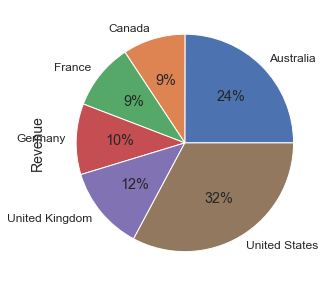

In [11]:
df2.plot(kind="pie", figsize=(10,5), autopct='%1d%%')
plt.show()

In [12]:
(2529914 / (2529914+789798+946624+833603+823481+3041468 )) * 100

28.220252166005867

In [13]:
df3 = df.groupby(["Product Category"])["Revenue"].sum()
df3

Product Category
Accessories    15117992
Bikes          61782134
Clothing        8370882
Name: Revenue, dtype: int64

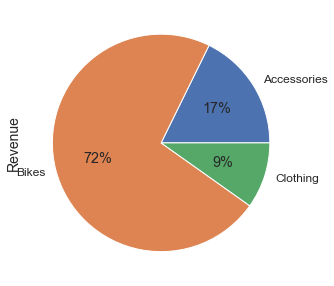

In [14]:
df3.plot(kind="pie", figsize=(10,5), autopct='%1d%%')
plt.show()

### Lab 4B

In [15]:
df4 = df.groupby(["Customer Gender"])["Revenue"].sum()
df4

Customer Gender
F    41935599
M    43335409
Name: Revenue, dtype: int64

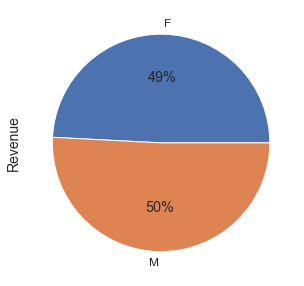

In [16]:
df4.plot(kind="pie", figsize=(10,5), autopct='%1d%%')
plt.show()

In [17]:
df5 = df.groupby(["Customer Gender","Frame Size"])["Revenue"].sum()
df5

Customer Gender  Frame Size
F                38.00         4030444
                 40.00          937184
                 42.00         3944614
                 44.00         2908570
                 46.00         3853349
                 48.00         3988474
                 50.00          921013
                 52.00         3165796
                 54.00          946401
                 56.00         1565157
                 58.00         1776214
                 60.00          704810
                 62.00         2240492
M                38.00         3903658
                 40.00          873535
                 42.00         4440734
                 44.00         3579112
                 46.00         3378489
                 48.00         4209074
                 50.00          954153
                 52.00         2791991
                 54.00          654006
                 56.00         1593648
                 58.00         1335253
                 60.00         10393

In [18]:
df6 = df.groupby(["Customer Gender","Age Group","Country"])["Revenue"].sum()
df6

Customer Gender  Age Group             Country       
F                Adults (35-64)        Australia         4794145
                                       Canada            2062851
                                       France            1890940
                                       Germany           2293603
                                       United Kingdom    2498885
                                       United States     7728725
                 Seniors (64+)         Australia           18896
                                       Canada              19853
                                       France               9467
                                       Germany              7060
                                       United Kingdom      18511
                                       United States       56263
                 Young Adults (25-34)  Australia         4342280
                                       Canada            1166696
                                    

#### Python code done by Dennis Lam